## Install and import necessary libraries

In [236]:
!pip install thefuzz
!pip install rapidfuzz
!pip install scipy
!pip install matplotlib
!pip install seaborn

In [237]:
import pandas as pd
from rapidfuzz import process
import re
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import chi2
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import numpy as np

### Open the dataset

In [238]:
# Turn variables into strings for reliable handling of data
dtype_dict = {
    'Author ID': str,
    'Monolingual': str,
    'ISBN': str,
    'Multilingual': str,
    'Publisher': str
}
source_df = pd.read_csv('JAFF_EDITIONS_DEF.csv', delimiter=';', dtype=dtype_dict)
source_df.head()
len(source_df)

20571

### Preprocessing

Identify whether an author/book/edition has been published by Big Five or not

Create column identifying 'Big Five' publishing houses and their imprints

In [239]:
# List 'Big Five' publishing houses and their imprints as indicated on www.9thstreetbooks.com
publishers = [
    # Penguin Random House
    "Penguin Random House",
    "DK",
    "DK (Darling Kindersley)",
    "Penguin Publishing Group",
    "Avery (prev. Gotham Press and Hudson Street Press)",
    "Berkley",
    "Berkley Trade",
    "Ace Books",
    "Jove Books (prev. Pyramid Books)",
    "New American Library",
    "Meridian",
    "Mentor Books",
    "Mentor-Omega",
    "Mentor Executive Library",
    "Mentor-Unesco Art Books",
    "NAL Trade",
    "Plume",
    "Signet",
    "Signet Books",
    "Signet Classics",
    "Signet Fiction",
    "Signet Science",
    "Signet Key",
    "Signette",
    "DAW",
    "Dutton",
    "Dutton Adult",
    "E. P. Dutton & Co., Inc.",
    "Family Tree Books",
    "G.P. Putnam’s Sons",
    "Impact Books",
    "Krause Publications",
    "North Light Books",
    "Penguin Books",
    "Penguin Classics",
    "Penguin Press",
    "Popular Woodworking",
    "Portfolio",
    "Riverhead Books",
    "Sentinel",
    "TarcherPerigee",
    "Viking",
    "Viking Adult",
    "Writer’s Digest",
    "Penguin Random House Audio Publishing Group",
    "Books on Tape",
    "Listening Library",
    "Living Language",
    "Penguin Random House Audio Publishing",
    "Random House Large Print",
    "Random House Puzzles and Games",
    "Random House Reference",
    "Penguin Young Readers Group",
    "Dial Books for Young Readers",
    "Dutton Children’s Books",
    "Firebird",
    "Frederick Warne",
    "G.P. Putnam’s Sons Books for Young Readers",
    "Kathy Dawson Books",
    "Kokila",
    "Nancy Paulsen Books",
    "Penguin Workshop",
    "Philomel",
    "Puffin Books",
    "Razorbill",
    "Speak",
    "Viking Children’s Books",
    "Random House",
    "Ballantine Books",
    "Bantam",
    "Bantam Dell Pub Group",
    "The Crown Publishing Group",
    "Clarkson Potter",
    "Convergent Books",
    "Crown Trade",
    "Hogarth",
    "Hogarth Regent",
    "Broadway Books",
    "Crown Archetype",
    "Crown Forum",
    "Forum",
    "Currency",
    "Harmony Books",
    "Image Catholic Books",
    "Jones Books",
    "Lorena Jones Books",
    "Multnomah",
    "Rodale books",
    "Ten Speed Press",
    "Tim Duggan Books",
    "WaterBrook",
    "Watson-Guptill",
    "Del Rey",
    "Dell",
    "Loveswept",
    "Lucas Books",
    "Modern Library",
    "One World",
    "Random House",
    "SJP",
    "Spiegel & Grau",
    "The Dial Press",
    "Three Rivers Press",
    "Random House Children’s Books",
    "Alfred A. Knopf Books for Young Readers",
    "Anne Schwartz Books",
    "Crown Books for Young Readers",
    "Delacorte Press",
    "Delacorte Books for YoungReaders",
    "Doubleday",
    "Dragonfly Books",
    "Ember",
    "Golden Books",
    "NOW I’M READING!",
    "Random House Books for Young Readers",
    "Sylvan Learning",
    "The Princeton Review",
    "Wendy Lamb Books",
    "Yearling Books",
    "The Knopf Doubleday Publishing Group",
    "Alfred A. Knopf",
    "Anchor Books",
    "Doubleday",
    "Everyman’s Library",
    "Nan A. Talese",
    "Pantheon Books",
    "Schocken Books",
    "Vintage Books",
    "Vintage Espanol",
    "Random House Audio",
    "Random House Trade Paperback",
    "Random House Red Fox",
    "Random House Australia",
    "Penguin Group (Australia)",
    "Michael Joseph: Penguin Australia",
    "Penguin Group (USA)",
    "Random House Value Publishing",
    # Macmillan
    "Macmillan",
    "Celadon Books",
    "Farrar, Straus and Giroux",
    "Picador Paper",
    "Flatiron Books",
    "First Second",
    "Henry Holt & Co.",
    "Metropolitan Books",
    "Macmillan Audio",
    "Quick and Dirty Tips",
    "St. Martin’s Publishing Group",
    "St. Martin’s Press",
    "St. Martin's Griffin",
    "Minotaur Books",
    "Thomas Dunne Books",
    "Castle Point Books",
    "Tor Books",
    "Forge Books",
    # Macmillan's Distributed Publishers
    "Childrens",
    "Macmillan Children’s Publishing Group",
    "FSG Books for Young Readers",
    "FSG Originals",
    "Feiwel & Friends",
    "Holt Books for Young Readers",
    "Imprint",
    "Kingfisher",
    "Neon Squid",
    "Odd Dot",
    "Priddy Books",
    "Roaring Brook Press",
    "Starscape/Tor Teen",
    "Square Fish",
    "Swoon Reads",
    "Swoon Romance",
    "Young Listeners",
    # Simon & Schuster
    "Simon & Schuster",
    "Simon & Schuster Adult Publishing",
    "Adams Media",
    "Atria",
    "Penerbit Atria",
    "Avid Reader Press",
    "Emily Bestler Books",
    "Enliven",
    "Folger Shakespeare Library",
    "Free Press",
    "Gallery",
    "Gallery Books",
    "Howard",
    "Jeter Publishing",
    "One Signal",
    "Scout Press",
    "Scribner Book Company",
    "Simon & Schuster",
    "Threshold",
    "Tiller Press",
    "Touchstone",
    "Simon & Schuster Children’s Publishing",
    "Aladdin",
    "Atheneum",
    "Simon & Schuster Books for Young Readers",
    "Beach Lane Books",
    "Denene Millner Books",
    "Little Simon",
    "Margaret K. McElderry",
    "Paula Wiseman Books",
    "Saga Press",
    "S&S Saga Press",
    "Salaam Reads",
    "Simon Spotlight",
    "Simon & Schuster Audio Publishing",
    "Pimsleur",
    "Simon & Schuster Audio",
    # Hachette
    "Hachette",
    "Grand Central Publishing",
    "Forever",
    "Forever Yours",
    "Legacy Lit",
    "Twelve",
    "Orbit Publishing",
    "Orbit",
    "Redhook",
    "Hachette Audio",
    "Wattpad",
    "Hachette Nashville",
    "Center Street",
    "FaithWords",
    "Worthy Books",
    "Little, Brown and Company",
    "Back Bay Books",
    "Little, Brown Spark",
    "Mulholland Books",
    "Voracious",
    "Little, Brown Books for Young Readers",
    "Christy Ottaviano Books",
    "JIMMY Patterson",
    "LB Kids",
    "Poppy",
    "Poppy Books",
    "Perseus",
    "Avalon Travel",
    "Moon Travel",
    "Rick Steves",
    "Basic Books",
    "Seal Press",
    "Hachette Books",
    "Hachette Go",
    "PublicAffairs",
    "Bold Type Books",
    "Economist Books",
    "Running Press",
    "Black Dog & Leventhal",
    # HarperCollins
    "Harper Collins",
    "Amistad",
    "Anthony Bourdain Books",
    "Avon",
    "Avon Books",
    "Avon Impulse",
    "Broadside Books",
    "Caedmon",
    "Custom House",
    "Dey Street Books",
    "Ecco",
    "Harper Books",
    "Harper Business",
    "Harper Design",
    "Harper Luxe",
    "Harper Perennial",
    "Harper Voyager",
    "Harper Wave",
    "HarperAudio",
    "HarperCollins 360",
    "HarperCollins Español",
    "HarperOne",
    "HarperVia",
    "William Morrow",
    "William Morrow Paperbacks",
    "William Morrow & Company",
    "William Morrow Large Print",
    "Harper Collins Germany",
    "HarperCollins Canada",
    "HarperCollins Publishers",
    "Harper Collins Italia",
    "HarperPrism",
    "Harper Paperbacks",
    "HarperCollins e-books",
    "Harper Collins UK",
    "Harper Collins B and Blackstone Audio",
    # HarperCollins Children’s
    "Amistad",
    "Balzer + Bray",
    "Greenwillow Books",
    "HarperAlley",
    "HarperChildren’s Audio",
    "HarperCollins Children’s Books",
    "HarperFestival",
    "HarperTeen",
    "Heartdrum",
    "Katherine Tegen Books",
    "Quill Tree Books",
    "Walden Pond Press",
    # Harper Collin's Christian Publishing
    "Bible Gateway",
    "Editorial Vida",
    "FaithGateway",
    "Grupo Nelson",
    "Nelson Books",
    "Olive Tree",
    "Thomas Nelson",
    "Thomas Nelson on Brilliance Audio",
    "Tommy Nelson",
    "W Publishing Group",
    "WestBow Press",
    "Zonderkidz",
    "Zondervan",
    "Zondervan Academic",
    # Harper Collin's Harlequin
    "Carina Press",
    "Carina UK",
    "Carina Collections",
    "Graydon House Books",
    "Hanover Square Press",
    "Harlequin Books",
    "HQN",
    "HQN Books",
    "Inkyard Press",
    "Love Inspired",
    "Love Inspired Historical",
    "Mills & Boon Love Inspired Historical",
    "Mira",
    "MIRA Books",
    "MIRA Taschenbuch",
    "Park Row Books",
    "Harlequin Books S.A.",
    "Harlequin Enterprises Ltd.",
    "Harlequin Mondadori",
    # Others
    "Albin Michel",
    "ALBIN MICHEL",
    "POCHE JEUNESSE",
    "Putnam books",
    "Plume",
    "Pantheon",
    "The Borough Press",
    "Anchor",
    "Knopf Canada",
    "Harlequin Ibérica, S.A.",
    "Thorndike Press",
    "Thorndike Pr",
    "Pan",
    "Twelve Towers Books",
    "ED DU MASQUE",
    "Le Masque",
    "Hodder Paperbacks",
    "Hodder & Stoughton",
    "Hodder & Stoughton Ltd",
    "Sonzogno",
    "Atria Books",
    "Piemme",
    "Piccadilly Press",
    "Piccadilly Press Ltd",
    "Mondadori",
    "Scholastic Inc.",
    "Curiosities (Imprint of Norilana Books)",
    "Echo Library",
    "Autumn Ink Press",
    "Arcana Gallery",
    "Union Square & Company"
]



In [240]:
# Define threshold to match publisher's name
threshold = 90

def is_match_over_threshold(query, choices, threshold):
    match = process.extractOne(query, choices)
    if match and match[1] >= threshold:
        return 1
    else:
        return 0

In [242]:
source_df['Big Publisher'] = source_df['Publisher'].apply(is_match_over_threshold, choices=publishers, threshold=threshold)
source_df.head()

,Title,Publication Date,Publisher,Format,Page Count,Author,Author ID,ISBN,ASIN,Edition Language,Average Rating,Rating Count,Book URL,Monolingual,Multilingual,Nr. of translations,Big Publisher
0,Les Enquêtes de Jane Austen - tome 2 - Un vole...,September 7th 2022,Albin Michel,1,Kindle Edition,Julia Golding,1332,NaN,B0DPC2VJ86,French,0.00,0,https://www.goodreads.com/book/show/222135869-...,NaN,x,1.0,1
1,Les Enquêtes de Jane Austen - tome 2 - Un vole...,November 28th 2024,ALBIN MICHEL,1,Kindle Edition,Julia Golding,1332,9782226478061,B0DP84W8W3,French,0.00,0,https://www.goodreads.com/book/show/222068206-...,NaN,x,NaN,1
2,Les enquêtes de Jane Austen - Tome 2: Un voleu...,January 29th 2025,POCHE JEUNESSE,288 pages,NaN,Julia Golding,1332,9782017297765,2017297763,French,0.00,0,https://www.goodreads.com/book/show/220520725-...,NaN,x,NaN,1
3,The Austen Intrigue (Regency Secrets #4),November 28th 2025,One More Chapter,Kindle Edition,NaN,Julia Golding,1332,9780008770839,B0F6QYPPTT,English,0.00,0,https://www.goodreads.com/book/show/232290671-...,NaN,x,NaN,0
4,Jane Austen Investigates: The Abbey Mystery (J...,April 23rd 2021,Lion Fiction,New edition,1,Julia Golding,1332,9781782643357,B08H2HR4J9,English,3.85,128,https://www.goodreads.com/book/show/56933218-j...,NaN,x,NaN,0


In [266]:
# Create 'Author_Type' column
source_df['Author_Type'] = ""

source_df.loc[source_df['Monolingual'] == 'x', 'Author_Type'] = 'Monolingual'
source_df.loc[source_df['Multilingual'] == 'x', 'Author_Type'] = 'Multilingual'


# Controllo distribuzione
print(source_df['Author_Type'].value_counts(dropna=False))   # conta anche valori NaN
print((source_df['Author_Type'].value_counts(dropna=False) /
       len(source_df) * 100).round(2))

Author_Type
Monolingual     11250
                 7408
Multilingual     1913
Name: count, dtype: int64
Author_Type
Monolingual     54.69
                36.01
Multilingual     9.30
Name: count, dtype: float64


# Subquestion 1: Does the linguistic-cultural background associated with a book’s author influence the probability that a given edition is published by a major publishing house?

## Chi^2 test

In [246]:
# Filter to keep only 'Monolingual' and 'Multilingual'
filtered_df = source_df[source_df['Author_Type'].isin(['Monolingual', 'Multilingual'])]

# Create contingency table
contingency_table = pd.crosstab(filtered_df['Author_Type'], filtered_df['Big Publisher'])
print("Contingency Table:")
print(contingency_table)


Contingency Table:
Big Publisher     0     1
Author_Type              
Monolingual    9723  1527
Multilingual   1518   395


In [200]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
# Expected frequencies are greater than 5, therefore the chi-square test can be trusted

Chi-square statistic: 65.06350973178793
p-value: 7.252265095707603e-16
Degrees of freedom: 1
Expected frequencies:
[[9607.32735699 1642.67264301]
 [1633.67264301  279.32735699]]


In [201]:
percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print(percentages)

Big Publisher          0          1
Author_Type                        
Monolingual    86.426667  13.573333
Multilingual   79.351803  20.648197


# Subquestion 2: Is the number of editions or translations per book influenced by the author’s linguistic-cultural background?

## Identify number of editions and translations for every book

### Number of editions - aggregate per Author ID and ASIN (unique identifier per each book)

In [248]:
works_df = source_df.drop_duplicates(subset=['Author ID', 'ASIN'])

works_df = works_df[works_df['Author_Type'].isin(['Monolingual', 'Multilingual'])]

# Count how many publications per author
pubs_per_author = works_df.groupby(['Author ID', 'Author_Type']).size().reset_index(name='editions_count')

# Distinguish per group
mono_authors = pubs_per_author[pubs_per_author['Author_Type'] == 'Monolingual']
multi_authors = pubs_per_author[pubs_per_author['Author_Type'] == 'Multilingual']

MONOLINGUALS (number of editions per author):
Mean: 18.551324503311257
Median: 7.0
std: 31.61646738412444
Variance: 999.6010098514046
Number of authors: 604

MULTILINGUALS (number of editions per author):
Mean: 15.414634146341463
Median: 6.0
std: 33.98937317757415
Variance: 1155.277489004397
Number of authors: 123


In [ ]:
# Calculate statistics for each author type
print("MONOLINGUALS (number of editions per author):")
print("Mean:", mono_authors['editions_count'].mean())
print("Median:", mono_authors['editions_count'].median())
print("std:", mono_authors['editions_count'].std())
print("Variance:", mono_authors['editions_count'].var())
print("Number of authors:", len(mono_authors))

print("\nMULTILINGUALS (number of editions per author):")
print("Mean:", multi_authors['editions_count'].mean())
print("Median:", multi_authors['editions_count'].median())
print("std:", multi_authors['editions_count'].std())
print("Variance:", multi_authors['editions_count'].var())
print("Number of authors:", len(multi_authors))

### Plot distribution

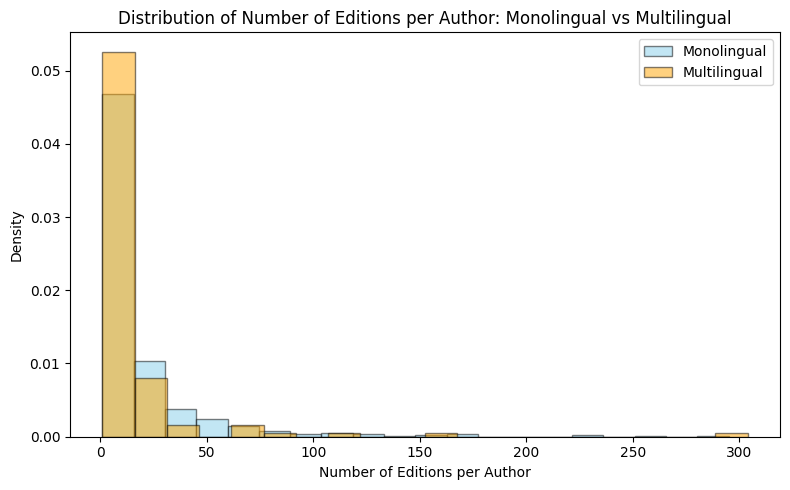

In [274]:
plt.figure(figsize=(8, 5))

# Histogram for Monolingual
plt.hist(
    mono_authors['editions_count'],
    bins=20,
    density=True,
    alpha=0.5,            
    color='skyblue',
    edgecolor='black',    
    label='Monolingual'
)
# Histogram for Multilingual
plt.hist(
    multi_authors['editions_count'],
    bins=20,
    density=True,
    alpha=0.5,
    color='orange',
    edgecolor='black',
    label='Multilingual'
)
plt.xlabel('Number of Editions per Author')
plt.ylabel('Density')
plt.title('Distribution of Number of Editions per Author: Monolingual vs Multilingual')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
t_stat, t_p = ttest_ind(mono_authors['editions_count'], multi_authors['editions_count'])

print("t-test p-value:", t_p)

In [ ]:
u_stat, u_p = mannwhitneyu( mono_authors['editions_count'], multi_authors['editions_count'], alternative='two-sided')
print("Mann-Whitney p-value:", u_p)

p-values > 0.05: the results are not statistically significant. There is not enough evidence to reject the null hypothesis; the groups are considered statistically similar.


### Number of translations - identified through close reading 

In [252]:
author_translations = (
    source_df[source_df['Author_Type'].isin(['Monolingual', 'Multilingual'])]
    .groupby(['Author ID', 'Author_Type'], as_index=False)['Nr. of translations']
    .first()  # Take the first value found in the 'Nr. of translations' column (it only appears once, not repeated for all rows of the same authpr) 
)

mono_trans = author_translations[author_translations['Author_Type'] == 'Monolingual']['Nr. of translations'].dropna()
multi_trans = author_translations[author_translations['Author_Type'] == 'Multilingual']['Nr. of translations'].dropna()

# Calculate statistics for each author type
print("MONOLINGUALS (Nr. of translations):")
print("Mean:", mono_trans.mean())
print("Median:", mono_trans.median())
print("std:", mono_trans.std())
print("Variance:", mono_trans.var())
print("Number of authors:", len(mono_trans))

print("\nMULTILINGUALS (Nr. of translations):")
print("Mean:", multi_trans.mean())
print("Median:", multi_trans.median())
print("std:", multi_trans.std())
print("Variance:", multi_trans.var())
print("Number of authors:", len(multi_trans))


MONOLINGUALS (Nr. of translations):
Mean: 4.195652173913044
Median: 2.5
std: 4.783761751286552
Variance: 22.88437649307218
Number of authors: 92

MULTILINGUALS (Nr. of translations):
Mean: 3.727272727272727
Median: 2.0
std: 7.212303100765801
Variance: 52.017316017316
Number of authors: 22


### Plot distribution

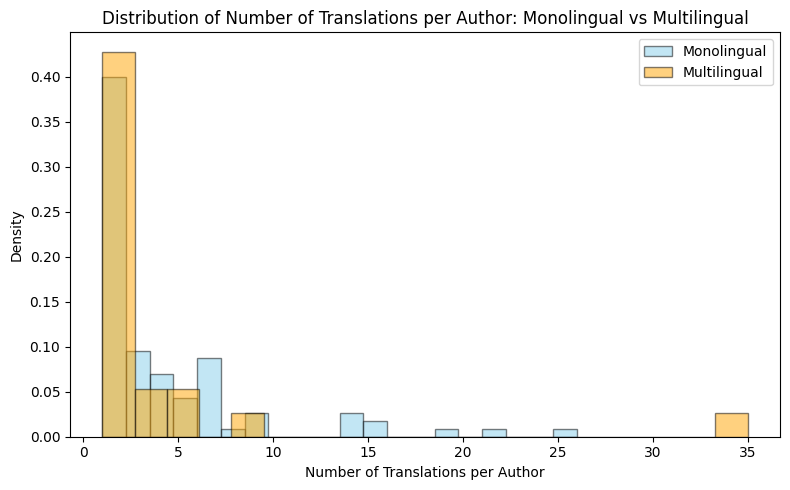

In [275]:
plt.figure(figsize=(8, 5))

# Histogram for Monolingual
plt.hist(
    mono_trans,
    bins=20,
    density=True, # normalization
    alpha=0.5,
    color='skyblue',
    edgecolor='black',
    label='Monolingual'
)
# Histogram for Multilingual
plt.hist(
    multi_trans,
    bins=20,
    density=True,
    alpha=0.5,
    color='orange',
    edgecolor='black',
    label='Multilingual'
)
plt.xlabel('Number of Translations per Author')
plt.ylabel('Density')
plt.title('Distribution of Number of Translations per Author: Monolingual vs Multilingual')
plt.legend()
plt.tight_layout()
plt.show()

## Mann Whitney U test because of different variances and highly skewed distributions

In [254]:
from scipy.stats import mannwhitneyu

# Run Mann Whitney-U
u_stat, p_value = mannwhitneyu(mono_trans, multi_trans, alternative='two-sided')

print("Mann-Whitney U statistic:", u_stat)
print("p-value:", p_value)

Mann-Whitney U statistic: 1202.0
p-value: 0.16040569022204454


same as number of editions, the distributions/groups are considered statistically similar.


# Subquestion 3: Does the author’s linguistic-cultural background impact readers’ perceptions (average ratings and ratings count) towards a book?

## Descriptive statistics for average ratings

In [257]:
# Keep only monolingual and multilingual authors
filtered_df = source_df[source_df['Author_Type'].isin(['Monolingual', 'Multilingual'])]

# Calculate the mean average rating for each author 
author_simple_avg = (
    filtered_df.groupby(['Author ID', 'Author_Type'])['Average Rating'].mean().reset_index(name='Simple_Average_Rating'))

# Calculate statistics for each author type
statistics = (author_simple_avg.groupby('Author_Type')['Simple_Average_Rating'].agg(['mean', 'median', 'std', 'var','count']))
print(statistics)


                  mean    median       std       var  count
Author_Type                                                
Monolingual   2.676519  2.691824  0.932855  0.870218    604
Multilingual  2.690111  2.801614  1.045786  1.093668    123


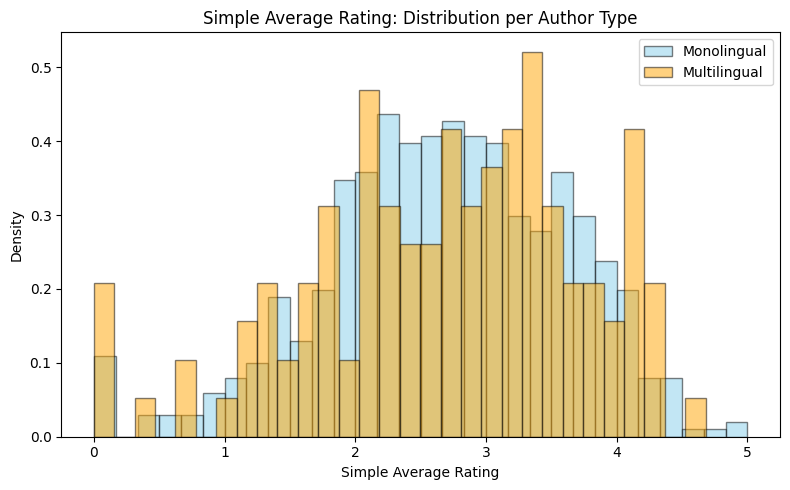

In [276]:
filtered_types = ['Monolingual', 'Multilingual']
filtered_data = author_simple_avg[author_simple_avg['Author_Type'].isin(filtered_types)]

mono_data = filtered_data[filtered_data['Author_Type'] == 'Monolingual']['Simple_Average_Rating']
multi_data = filtered_data[filtered_data['Author_Type'] == 'Multilingual']['Simple_Average_Rating']

# Histogram for Monolingual 
plt.figure(figsize=(8, 5))
plt.hist(
    mono_data, 
    bins=30, 
    alpha=0.5, 
    label='Monolingual', 
    edgecolor='black',
    density=True, # normalization
    color='skyblue'
)

# Histogram for Multilingual
plt.hist(
    multi_data, 
    bins=30, 
    alpha=0.5, 
    label='Multilingual', 
    edgecolor='black',
    density=True,
    color='orange'
)
plt.legend()
plt.title('Simple Average Rating: Distribution per Author Type')
plt.xlabel('Simple Average Rating')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

## Ttest - variances are similar and distributions close to normal

In [261]:
# Extract the ratings for each group
monolingual = author_simple_avg[author_simple_avg['Author_Type'] == 'Monolingual']['Simple_Average_Rating']
multilingual = author_simple_avg[author_simple_avg['Author_Type'] == 'Multilingual']['Simple_Average_Rating']

# Run t-test
t_stat, p_value = stats.ttest_ind(monolingual, multilingual, equal_var=False)

print(f"T-statistic: {t_stat:}, p-value: {p_value:}")

T-statistic: -0.134, p-value: 0.8938


once again, the result is not statistically significant.


## Descriptive statistics for ratings count

In [263]:
filtered_df = source_df[source_df['Author_Type'].isin(['Monolingual', 'Multilingual'])]

author_mean_rating_count = (
    filtered_df.groupby(['Author ID', 'Author_Type'])['Rating Count'].mean().reset_index(name='Mean_Ratings_Count'))

statistics = (author_mean_rating_count.groupby('Author_Type')['Mean_Ratings_Count'].agg(['mean', 'median', 'std', 'var', 'count']))
print(statistics)


                    mean     median         std            var  count
Author_Type                                                          
Monolingual   135.976150  47.613358  280.841903   78872.174309    604
Multilingual  173.109768  52.111111  380.685421  144921.389542    123


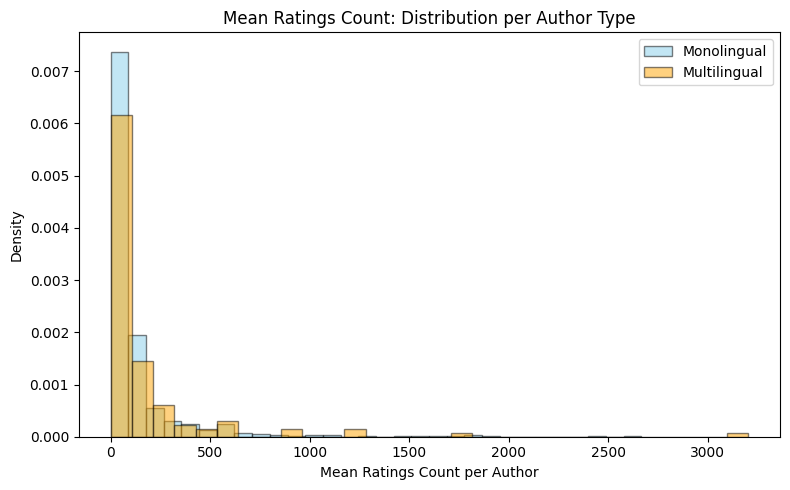

In [277]:
filtered_types = ['Monolingual', 'Multilingual']
filtered_data = author_mean_rating_count[author_mean_rating_count['Author_Type'].isin(filtered_types)]

mono_data = filtered_data[filtered_data['Author_Type'] == 'Monolingual']['Mean_Ratings_Count']
multi_data = filtered_data[filtered_data['Author_Type'] == 'Multilingual']['Mean_Ratings_Count']

plt.figure(figsize=(8, 5))

# Histogram for Monolingual 
plt.hist(
    mono_data,
    bins=30,
    alpha=0.5,
    label='Monolingual',
    edgecolor='black',
    density=True,
    color='skyblue'
)
# Histogram for Multilingual 
plt.hist(
    multi_data,
    bins=30,
    alpha=0.5,
    label='Multilingual',
    edgecolor='black',
    density=True,
    color='orange'
)
plt.legend()
plt.title('Mean Ratings Count: Distribution per Author Type')
plt.xlabel('Mean Ratings Count per Author')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [265]:
# Extract the mean ratings count per group
mono = author_mean_rating_count[author_mean_rating_count['Author_Type'] == 'Monolingual']['Mean_Ratings_Count']
multi = author_mean_rating_count[author_mean_rating_count['Author_Type'] == 'Multilingual']['Mean_Ratings_Count']

# Run Mann Whitney-U
u_stat, p_value = mannwhitneyu(mono, multi, alternative='two-sided')
print(f"U statistic: {stat}, p-value: {p}")


U statistic: 35389.5, p-value: 0.40815479406484934


result is not statistically significant, not unlike other variables.